<a href="https://colab.research.google.com/github/WilliamCastro18/Treinamento-de-modelos/blob/main/Trabalho_Fl%C3%A1vio_Estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho de Ferramentas de IA **

Isabelli, Guilherme, Jean, Eduardo e William

Este estudo investiga os fatores que contribuem para o estresse em estudantes, considerando dimensões psicológica, fisiológica, social e acadêmica. Conectamos o conjunto de dados ao Google Drive e, usando a biblioteca pandas, importamos o arquivo .csv.

Em seguida realizamos o pré-processamento necessário para o treinamento (tratamento de valores ausentes, codificação de variáveis categóricas, normalização/ padronização e separação em conjuntos de treino e teste). O nível de estresse foi codificado em três classes — 0, 1 e 2 — representando, respectivamente, baixo, médio e alto nível de estresse. Apesar do dataset conter muitos atributos, selecionamos inicialmente os cinco atributos mais relevantes com base na importância de variáveis estimada pelo modelo Random Forest. Esses atributos foram então utilizados nas etapas subsequentes de modelagem e avaliação.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Flávio - Estudantes/estudantes.csv')

In [ ]:
#key_column = ['autoestima', 'ansiedade', 'qualidade_do_sono', 'carga_de_estudos', 'preocupacao_futuro_profissional']

key_columns = ['pressao_sanguinea', 'atividades_extracurriculares', 'bullying', 'qualidade_do_sono', 'seguranca']

#x = df.drop(['nivel_de_stress'], axis=1)
x = df

# Retirando colunas que não serão usadas na análise
for column in df.columns:
  if column not in key_columns:
   x = x.drop([column], axis=1)

y = df["nivel_de_stress"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

print('X_train= ', X_train.shape)
print('X_test= ', X_test.shape)
print('y_train= ', y_train.shape)
print('y_test= ', y_test.shape)

X_train=  (880, 5)
X_test=  (220, 5)
y_train=  (880,)
y_test=  (220,)


In [ ]:
#class_names = y.unique()
#colors = ['blue', 'red', 'green'] # Assuming there are at most 3 unique stress levels based on the plot code

#plt.figure(figsize=(10, 6))

#for i, class_name in enumerate(class_names):
 #   plt.scatter(
  #      x[y == class_name][key_columns[0]],  # Using the first specified attribute
   #     x[y == class_name][key_columns[1]],  # Using the second specified attribute
    #    c=colors[i % len(colors)],
     #   edgecolors='k',
      #  s=50,
       # label=f'Nivel de Stress: {class_name}'
    #)

#plt.xlabel(key_column[0]) # Use the actual column name for the x-axis
#plt.ylabel(key_column[1]) # Use the actual column name for the y-axis
#plt.title('Distribuição dos dados por nível de stress (Autoestima vs Ansiedade)')
#plt.legend(loc='upper right')
#plt.show()

# Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=4, random_state=42)

clf.fit(X_train ,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Mostrar a acurácia do modelo
print(f"A acurácia do modelo no conjunto de teste é: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

A acurácia do modelo no conjunto de teste é: 0.86
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        76
           1       0.93      0.85      0.89        73
           2       0.91      0.83      0.87        71

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220



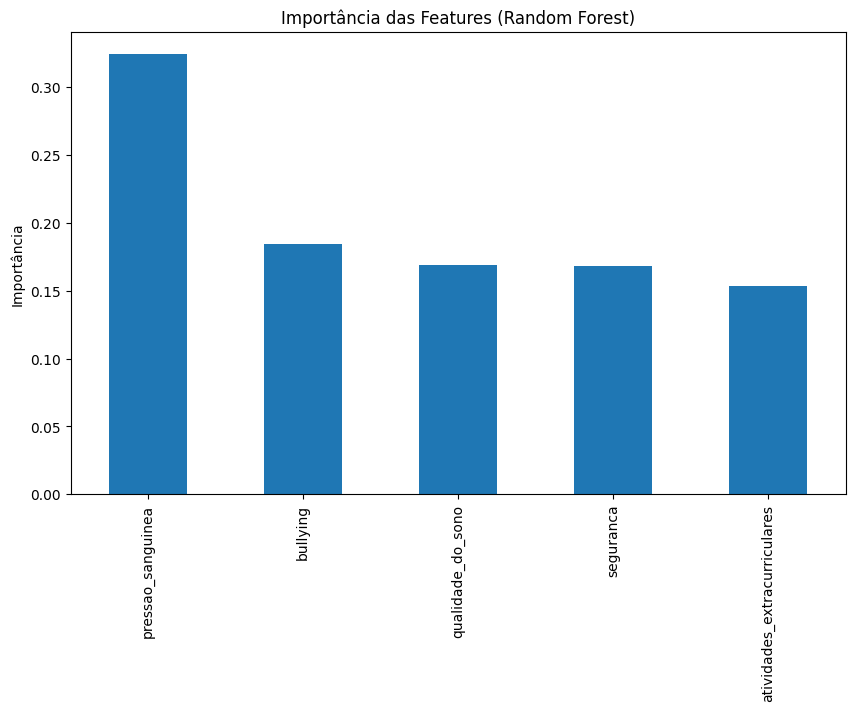

In [ ]:
# Plotting feature importances
importances = pd.Series(clf.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Importância das Features (Random Forest)')
plt.ylabel('Importância')
plt.show()

Por meio da análise de importância de atributos realizada pelo modelo Random Forest, foi possível identificar quais fatores apresentam maior influência sobre os níveis de estresse dos estudantes. Os cinco atributos mais relevantes foram:

* **pressao_sanguinea**
* **atividades_extracurriculares**
* **bullying**
* **qualidade_do_sono**
* **seguranca**

Diante dessa análise, optamos por direcionar o estudo para esses atributos, já que representam as variáveis mais significativas para o problema em questão. Mesmo após a redução do número de atributos, o modelo manteve um desempenho consistente, alcançando uma acurácia de 0,86, o que reforça a adequação da escolha e a robustez do algoritmo Random Forest na tarefa de classificação.

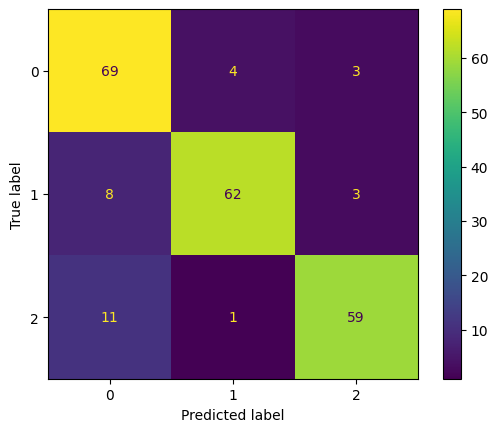

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['0', '1', '2'])
disp.plot()
plt.show()

**Resultados — Random Forest**

A matriz de confusão obtida para o modelo Random Forest evidencia um desempenho consistente, mas ligeiramente inferior ao da Árvore de Decisão (acurácia de 0,86 contra 0,90).

A distribuição das predições foi a seguinte:

* **Nível 0 (baixo estresse):** 69 amostras foram classificadas corretamente, enquanto 4 foram confundidas com nível 1 e 3 com nível 2.

* **Nível 1 (estresse moderado):** 62 amostras foram classificadas corretamente. No entanto, 8 foram classificadas incorretamente como nível 0 e 3 como nível 2, este nível obteve uma taxa de acerto maior, quando comparada com a Árvore de Decisão.

* **Nível 2 (alto estresse):** 59 amostras foram classificadas corretamente, mas 11 foram confundidas com nível 0 e 1 com nível 1.

Esses resultados indicam que, assim como no modelo de Árvore de Decisão, o nível 0 apresenta maior taxa de acerto, enquanto o nível 1 continua sendo a classe mais confusa, com amostras divididas entre baixo e alto estresse. O nível 2 apresenta a maior discrepância, com casos de alto estresse sendo erroneamente classificados como baixo estresse, um erro mais crítico do ponto de vista prático.

# Árvore de Decisão

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=42, max_depth=3, criterion='entropy')
                                 #, max_depth=3, criterion="gini", min_samples_split=15, class_weight={0:2.5, 1:1})
dt.fit(X_train ,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = dt.predict(X_test)

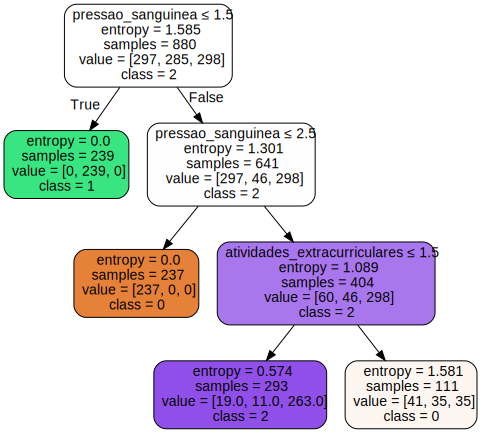

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None,
                      feature_names=key_columns,
                      class_names=['0', '1', '2'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Mostrar a acurácia do modelo
print(f"A acurácia do modelo no conjunto de teste é: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

A acurácia do modelo no conjunto de teste é: 0.90
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        76
           1       1.00      0.84      0.91        73
           2       0.91      0.89      0.90        71

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



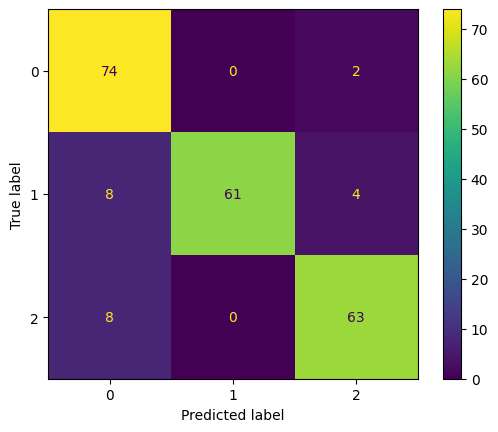

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['0', '1', '2'])
disp.plot()
plt.show()

**Resultados da Árvore de decisão**

Após o pré-processamento e a seleção de variáveis, treinamos o modelo para identificar o nível de estresse dos estudantes considerando cinco atributos principais:

* **pressao_sanguinea**
* **atividades_extracurriculares**
* **bullying**
* **qualidade_do_sono**
* **seguranca**

O modelo alcançou uma acurácia de 0,90, o que representa um desempenho bastante satisfatório na classificação dos diferentes níveis de estresse.

Para uma análise mais detalhada, avaliamos o desempenho por meio da matriz de confusão. Os resultados obtidos foram:

* **Nível 0 (baixo estresse):** 74 amostras foram corretamente classificadas. Apenas 2 amostras foram incorretamente identificadas como nível 2.

* **Nível 1 (estresse moderado):** 61 amostras foram corretamente classificadas. Entretanto, 8 amostras foram classificadas como nível 0 e 4 como nível 2.

* **Nível 2 (alto estresse):** 63 amostras foram corretamente classificadas. Contudo, houve 8 casos classificados incorretamente como nível 0, representando a maior discrepância do modelo.

Esses resultados evidenciam que o modelo apresenta maior precisão na identificação de alunos com nível de estresse baixo (nível 0). No entanto, no nível 1, ocorre maior confusão, com o modelo confundindo amostras entre baixo e alto estresse. Já no nível 2, observamos a maior divergência, pois algumas amostras de alto estresse foram classificadas como baixo estresse, um erro mais preocupante do ponto de vista prático.

## SVM

In [ ]:
svm_train = svm.SVC(decision_function_shape='ovo')

svm_train.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

A acurácia do modelo SVM no conjunto de teste é: 0.85
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        76
           1       0.95      0.84      0.89        73
           2       0.85      0.80      0.83        71

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



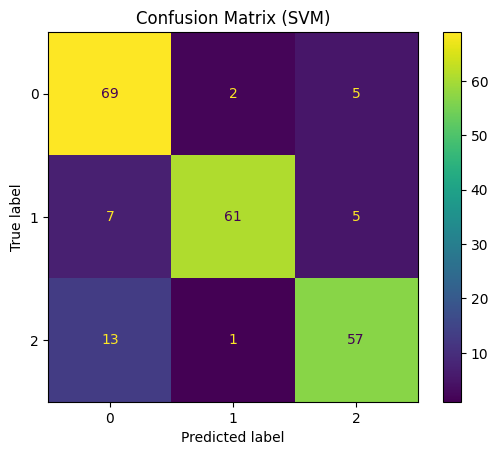

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred_svm = svm_train.predict(X_test)

# Mostrar a acurácia do modelo
print(f"A acurácia do modelo SVM no conjunto de teste é: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))

# Plotting the confusion matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=['0', '1', '2'])
disp_svm.plot()
plt.title('Confusion Matrix (SVM)')
plt.show()

**Resultados — SVM**

Entre os modelos testados, o SVM apresentou a menor acurácia, com valor de 0,85, conforme evidenciado pela matriz de confusão:

* **Nível 0 (baixo estresse):** 69 amostras foram classificadas corretamente. No entanto, 2 foram confundidas com nível 1 e 5 com nível 2.

* **Nível 1 (estresse moderado):** 61 amostras foram corretamente classificadas, enquanto 7 foram confundidas com nível 0 e 5 com nível 2.

* **Nível 2 (alto estresse):** 57 amostras foram corretamente classificadas, porém 13 foram incorretamente rotuladas como nível 0 e 1 como nível 1.

De forma consistente com os modelos anteriores, o nível 0 apresentou a maior taxa de acerto. Já o nível 1 continua apresentando confusão, embora com desempenho semelhante ao observado na Árvore de Decisão. O ponto mais crítico está no nível 2, em que o modelo classificou 13 amostras de alto estresse como baixo estresse, o que representa um erro relevante do ponto de vista prático, visto que casos mais graves podem ser subestimados.

## Comparação de métricas F1

**Análise do F1 Score por Modelo e Nível de Estresse**

Para complementar a análise, examinamos o F1 Score para cada modelo e nível de estresse. O F1 Score é uma métrica que combina precisão e recall, sendo útil especialmente em casos de classes desbalanceadas ou quando ambos, falsos positivos e falsos negativos, são relevantes.

Observando os resultados:

*   **Nível 0 (Baixo Estresse):**
    *   Árvore de Decisão: 0.89
    *   Random Forest: 0.84
    *   SVM: 0.84
    * A Árvore de Decisão apresentou o melhor F1 Score para o nível de baixo estresse, indicando um bom equilíbrio entre precisão e recall na identificação desta classe.

*   **Nível 1 (Estresse Médio):**
    *   Árvore de Decisão: 0.91
    *   Random Forest: 0.89
    *   SVM: 0.89
    * A Árvore de Decisão também se destacou no nível de estresse médio com o maior F1 Score. Random Forest e SVM tiveram desempenhos semelhantes, ligeiramente inferiores.

*   **Nível 2 (Alto Estresse):**
    *   Árvore de Decisão: 0.90
    *   Random Forest: 0.87
    *   SVM: 0.83
    * Novamente, a Árvore de Decisão obteve o melhor F1 Score para o nível de alto estresse. O SVM apresentou o menor F1 Score para esta classe, sugerindo que este modelo tem mais dificuldade em equilibrar a precisão e o recall na identificação de casos de alto estresse em comparação com os outros modelos.

Em resumo, a análise do F1 Score corrobora as conclusões baseadas na acurácia e na matriz de confusão: a Árvore de Decisão demonstrou o desempenho mais robusto entre os três modelos para a classificação dos diferentes níveis de estresse, apresentando os maiores F1 Scores em todas as classes. O SVM, por sua vez, teve o desempenho mais fraco, especialmente na identificação do nível de alto estresse.